<td>
    <a target="_blank" href="https://colab.research.google.com/github/jjerry-k/learning_framework/blob/main/01_Basic/Linear_Regression/PyTorch.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
</td>

In [1]:
import torch
from torch import nn
from torch import optim
import numpy as np

from matplotlib import pyplot as plt

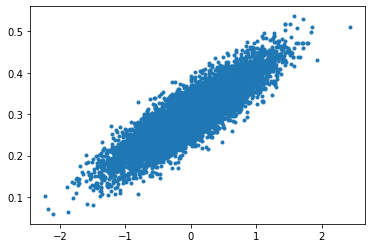

In [2]:
W = 0.1
B = 0.3

x = np.random.normal(0.0, 0.55, (10000, 1))
y = x * W + B + np.random.normal(0.0, 0.03, (10000,1))

plt.plot(x, y, ".")
plt.show()

x_data = torch.Tensor(x)
y_data = torch.Tensor(y)

In [3]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, X):
        X = self.linear(X)
        return X

model = Model()
criterion  = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)

Epoch :  1  Loss :  1.6510309
Epoch :  100  Loss :  0.0014019563


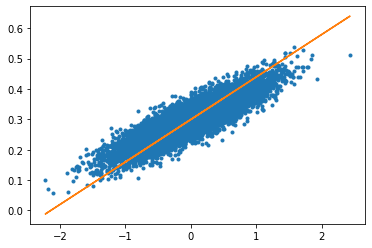

Epoch :  200  Loss :  0.0009124739


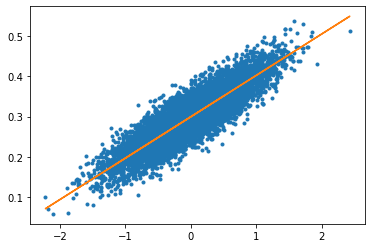

Epoch :  300  Loss :  0.00091134454


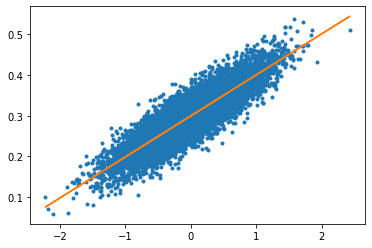

Epoch :  400  Loss :  0.00091134186


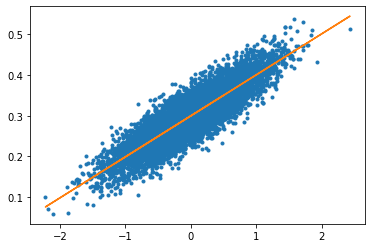

Epoch :  500  Loss :  0.00091134186


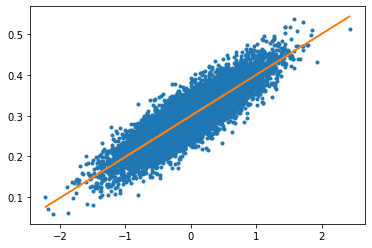

Real W: 0.1, Predict W: 0.10081441700458527
Real B: 0.3, Predict B: 0.29965338110923767


In [4]:
# Training loop
for epoch in range(500):
    y_pred = model.forward(x_data)

    loss = criterion(y_pred, y_data)
    
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch ==0 :
        print("Epoch : ", epoch+1, " Loss : ", loss.data.numpy())
    
    elif (epoch+1) % 100 == 0 :
        print("Epoch : ", epoch+1, " Loss : ", loss.data.numpy())
        param = list(model.parameters())
        plt.plot(x, y, ".")
        plt.plot(x, x*param[0].item() + param[1].item(), "-")
        plt.show()
    
# After Training, check parameters
param = list(model.parameters())
print(f"Real W: {W}, Predict W: {param[0].item()}")
print(f"Real B: {B}, Predict B: {param[1].item()}")